**Корректность проверена на Python 3.6:**
+ numpy 1.15.4
+ pandas 0.23.4

# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
adver_data = pd.read_csv('advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [24]:
adver_data.head(5)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


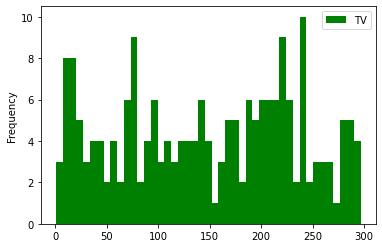

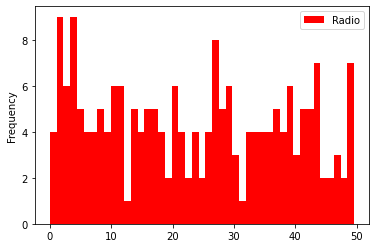

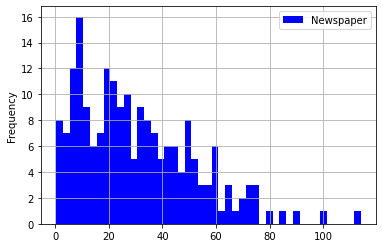

In [25]:
adver_data.plot(kind = 'hist', y = 'TV',color = 'green',bins = 45)
adver_data.plot(kind = 'hist', y = 'Radio',color = 'red',bins = 45)
adver_data.plot(kind = 'hist', y = 'Newspaper',color = 'blue',bins = 45)
plt.grid(True)

**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [26]:
X = adver_data[['TV','Radio','Newspaper']].values # Ваш код здесь
y = adver_data[['Sales']].values# Ваш код здесь
y

array([[22.1],
       [10.4],
       [ 9.3],
       [18.5],
       [12.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [10.6],
       [ 8.6],
       [17.4],
       [ 9.2],
       [ 9.7],
       [19. ],
       [22.4],
       [12.5],
       [24.4],
       [11.3],
       [14.6],
       [18. ],
       [12.5],
       [ 5.6],
       [15.5],
       [ 9.7],
       [12. ],
       [15. ],
       [15.9],
       [18.9],
       [10.5],
       [21.4],
       [11.9],
       [ 9.6],
       [17.4],
       [ 9.5],
       [12.8],
       [25.4],
       [14.7],
       [10.1],
       [21.5],
       [16.6],
       [17.1],
       [20.7],
       [12.9],
       [ 8.5],
       [14.9],
       [10.6],
       [23.2],
       [14.8],
       [ 9.7],
       [11.4],
       [10.7],
       [22.6],
       [21.2],
       [20.2],
       [23.7],
       [ 5.5],
       [13.2],
       [23.8],
       [18.4],
       [ 8.1],
       [24.2],
       [15.7],
       [14. ],
       [18. ],
       [ 9.3],
       [ 9

**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [27]:
means, stds = np.mean(X,axis=0), np.std(X,axis= 0)# Ваш код здесь
means,stds


(array([147.0425,  23.264 ,  30.554 ]),
 array([85.63933176, 14.80964564, 21.72410606]))

In [28]:
for item in range(len(X)):
    for k in range(0,3):
        X[item][k] = (X[item][k] - means[k]/stds[k])
X

 # Ваш код здесь

array([[ 2.28383003e+02,  3.62291319e+01,  6.77935440e+01],
       [ 4.27830027e+01,  3.77291319e+01,  4.36935440e+01],
       [ 1.54830027e+01,  4.43291319e+01,  6.78935440e+01],
       [ 1.49783003e+02,  3.97291319e+01,  5.70935440e+01],
       [ 1.79083003e+02,  9.22913189e+00,  5.69935440e+01],
       [ 6.98300272e+00,  4.73291319e+01,  7.35935440e+01],
       [ 5.57830027e+01,  3.12291319e+01,  2.20935440e+01],
       [ 1.18483003e+02,  1.80291319e+01,  1.01935440e+01],
       [ 6.88300272e+00,  5.29131894e-01, -4.06456032e-01],
       [ 1.98083003e+02,  1.02913189e+00,  1.97935440e+01],
       [ 6.43830027e+01,  4.22913189e+00,  2.27935440e+01],
       [ 2.12983003e+02,  2.24291319e+01,  2.59354397e+00],
       [ 2.20830027e+01,  3.35291319e+01,  6.44935440e+01],
       [ 9.57830027e+01,  6.02913189e+00,  5.79354397e+00],
       [ 2.02383003e+02,  3.13291319e+01,  4.45935440e+01],
       [ 1.93683003e+02,  4.61291319e+01,  5.14935440e+01],
       [ 6.60830027e+01,  3.50291319e+01

**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [55]:
import numpy as np
b = np.ones(X.shape[0]) # 1 matrix
d = b.reshape((X.shape[0],1)) # column of ones
X = np.hstack((d, X))


array([[  1.        ,   1.        ,   1.        , ..., 228.38300272,
         36.22913189,  67.79354397],
       [  1.        ,   1.        ,   1.        , ...,  42.78300272,
         37.72913189,  43.69354397],
       [  1.        ,   1.        ,   1.        , ...,  15.48300272,
         44.32913189,  67.89354397],
       ...,
       [  1.        ,   1.        ,   1.        , ..., 175.28300272,
          7.72913189,   4.99354397],
       [  1.        ,   1.        ,   1.        , ..., 281.88300272,
         40.42913189,  64.79354397],
       [  1.        ,   1.        ,   1.        , ..., 230.38300272,
          7.02913189,   7.29354397]])

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [138]:
def mserror(y, y_pred):
    s, s_pred = pd.Series(y), pd.Series(y_pred)
    return float(sum((s-s_pred)**2)/len(y))
mserror([34], [20])

196.0

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'1 задание'.***

In [101]:
y_pred=np.array([float(np.median(y)) for i in range(len(y))]).reshape(y.shape) # формируется матрица из 200 элементов медианы у

answer1 = mserror(y.ravel(), y_pred.ravel())
print(round(answer1, 3))


28.346


**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [108]:
def normal_equation(X, y):
    return np.dot(np.dot(np.linalg.pinv(np.dot(X.T,X)),X.T),y) # нормальное уравнение

In [117]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

[[ 0.20701023]
 [ 0.20701023]
 [ 0.20701023]
 [ 0.20701023]
 [ 0.20701023]
 [ 0.20701023]
 [ 0.20701023]
 [ 0.20701023]
 [ 0.20701023]
 [ 0.20701023]
 [ 0.20701023]
 [ 0.20701023]
 [ 0.20701023]
 [ 0.20701023]
 [ 0.20701023]
 [ 0.20701023]
 [ 0.04576465]
 [ 0.18853002]
 [-0.00103749]]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Полученный результат, округленный до 3 знаков после запятой, является ответом на *'2 задание'*.**

In [114]:
answer2 = np.dot(np.mean(X,axis=0),norm_eq_weights)
print(np.round(answer2, 3))

[14.023]


**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [131]:
def linear_prediction(X, w):
    return np.dot(X,w)
a = np.array(linear_prediction(X, normal_equation(X, y)))
a

array([[20.52397441],
       [12.33785482],
       [12.30767078],
       [17.59782951],
       [13.18867186],
       [12.47834763],
       [11.72975995],
       [12.12295317],
       [ 3.72734086],
       [12.55084872],
       [ 7.0322992 ],
       [17.28512918],
       [10.57712073],
       [ 8.82630048],
       [18.43436638],
       [20.81929952],
       [12.82365674],
       [23.22495716],
       [ 9.95168206],
       [14.16607293],
       [18.10076728],
       [14.7405382 ],
       [ 6.4891503 ],
       [16.5459329 ],
       [ 8.14651887],
       [15.6100386 ],
       [14.98951429],
       [17.05167344],
       [19.41053803],
       [ 9.14402389],
       [21.6339338 ],
       [11.3460929 ],
       [ 7.63888314],
       [18.86426829],
       [ 7.57483051],
       [17.00682618],
       [23.40590052],
       [15.62347779],
       [ 9.90868103],
       [20.44761039],
       [16.37766467],
       [17.2959832 ],
       [21.59580326],
       [13.96385684],
       [ 8.88787996],
       [15

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения?
Полученный результат, округленный до 3 знаков после запятой, является ответом на *'3 задание'***

In [137]:
answer3 = mserror(y.reshape(-1), a.reshape(-1))
print(answer3)


2.784126314510936


**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

In [159]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    grad0 = w[0]-(2.0*eta)/X.shape[0]*X[train_ind,0]*((w[0]*X[train_ind,0]+w[1]*X[train_ind,1]+w[2]*X[train_ind,2]+w[3]*X[train_ind,3])-y[train_ind])
    grad1 = w[1]-(2.0*eta)/X.shape[0]*X[train_ind,1]*((w[0]*X[train_ind,0]+w[1]*X[train_ind,1]+w[2]*X[train_ind,2]+w[3]*X[train_ind,3])-y[train_ind])
    grad2 = w[2]-(2.0*eta)/X.shape[0]*X[train_ind,2]*((w[0]*X[train_ind,0]+w[1]*X[train_ind,1]+w[2]*X[train_ind,2]+w[3]*X[train_ind,3])-y[train_ind])
    grad3 = w[3]-(2.0*eta)/X.shape[0]*X[train_ind,3]*((w[0]*X[train_ind,0]+w[1]*X[train_ind,1]+w[2]*X[train_ind,2]+w[3]*X[train_ind,3])-y[train_ind])
    return  np.array([grad0, grad1, grad2, grad3])

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [154]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом.
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)

    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])

        # Ваш код здесь
        old_w = w
        w = stochastic_gradient_step(X, y, w, random_ind, eta=0.01)
        weight_dist = np.linalg.norm(w - old_w)
        errors.append(mserror(y,np.dot(X,w)))
        iter_num += 1
        
    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [161]:
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X,
y, [0,0,0,0], 0.01, 100000, 1e-8, 42, False)

ValueError: shapes (200,19) and (4,1) not aligned: 19 (dim 1) != 4 (dim 0)

**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

In [ ]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

In [ ]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [ ]:
stoch_grad_desc_weights

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [ ]:
stoch_errors_by_iter[-1]

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'4 задание'*.**

In [139]:
answer4 = # Ваш код здесь
print(round(answer4, 3))

SyntaxError: invalid syntax (<ipython-input-139-9ec35cfa61b6>, line 1)

array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        , 55.78300272, 31.22913189, 22.09354397])